# Titanic, Machine Learning from Disaster

# Overview 

This project was done as a requirement for Data Science Immersive Course with General Assembly and Misk Academy.

Team members:
- [Yousef Alaqil](https://www.linkedin.com/in/yousef-alaqil-data-scientist/)
- [Roaa Albader](https://www.linkedin.com/in/roaa-albader-datascientist/)
- [Ghadah Alqahtani](https://www.linkedin.com/in/ghadah-alqahtani-datascientist/)
- [Norah AlAsfour](https://www.linkedin.com/in/norah-alasfour/)

We used classification models to predict the survival status of Titanic's passengers.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Modeling](#Modeling)

## Datasets Description

[The dataset](https://www.kaggle.com/c/titanic/overview) contains passengers information.

## Data Import and Cleaning

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_biclusters
from sklearn.model_selection import cross_val_score, train_test_split , GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
Titanic= pd.concat([train.drop(columns='Survived'), test])

In [5]:
Titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Titanic.shape

(1309, 11)

In [7]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [8]:
Titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
Titanic['Parch'] = Titanic.Parch.astype('object')
Titanic['SibSp'] = Titanic.SibSp.astype('object')
Titanic['Pclass'] = Titanic.Pclass.astype('object')

In [10]:
Titanic.isna().sum().sort_values(ascending=False)

Cabin          1014
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

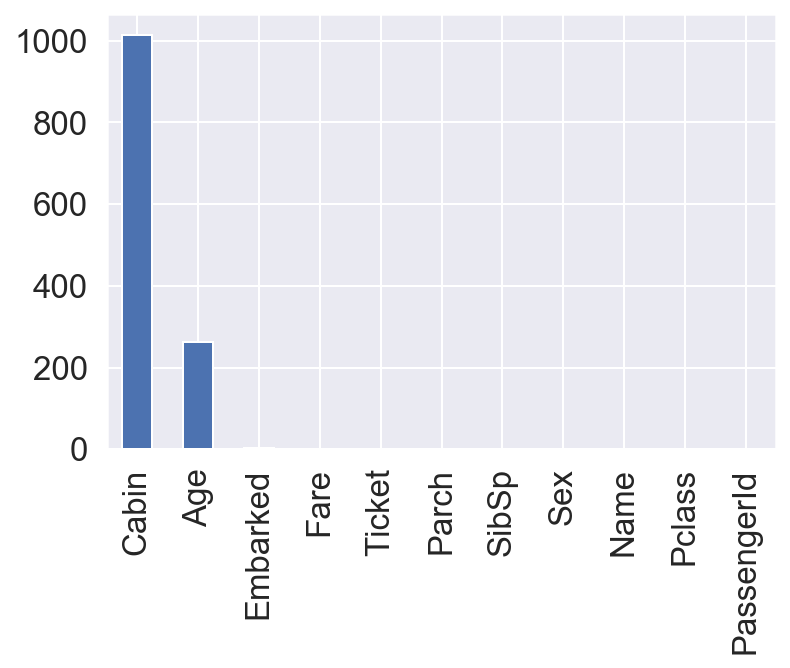

In [11]:
Titanic.isna().sum().sort_values(ascending=False).plot(kind='bar')

In [12]:
Titanic['Age']=Titanic['Age'].fillna(Titanic['Age'].mean())

In [13]:
Titanic['Cabin']=Titanic['Cabin'].fillna('None')

In [14]:
Titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
Titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
Titanic['Embarked'].mode()

0    S
dtype: object

In [17]:
Titanic['Embarked']=Titanic['Embarked'].fillna('S')

In [18]:
Titanic['Fare']=Titanic['Fare'].fillna(Titanic['Fare'].mean())

In [19]:
Titanic.isna().sum().sort_values(ascending=False)

Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

In [20]:
df_training = Titanic[Titanic['PassengerId'] <= 891 ]
df_training['Survived'] = train['Survived']
df_training.head()

/Users/nora_1m/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,0


In [21]:
df_testing = Titanic[Titanic['PassengerId'] > 891 ]
df_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,None,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,None,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,None,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,None,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,None,S


In [22]:
df_training.columns = map(str.lower , df_training.columns)

In [23]:
df_testing.columns = map(str.lower , df_testing.columns)

## Exploratory Data Analysis

In [24]:
df_training.describe()

,passengerid,age,fare,survived
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.735277,32.204208,0.383838
std,257.353842,13.002218,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,22.000000,7.910400,0.000000
50%,446.000000,29.881138,14.454200,0.000000
75%,668.500000,35.000000,31.000000,1.000000
max,891.000000,80.000000,512.329200,1.000000


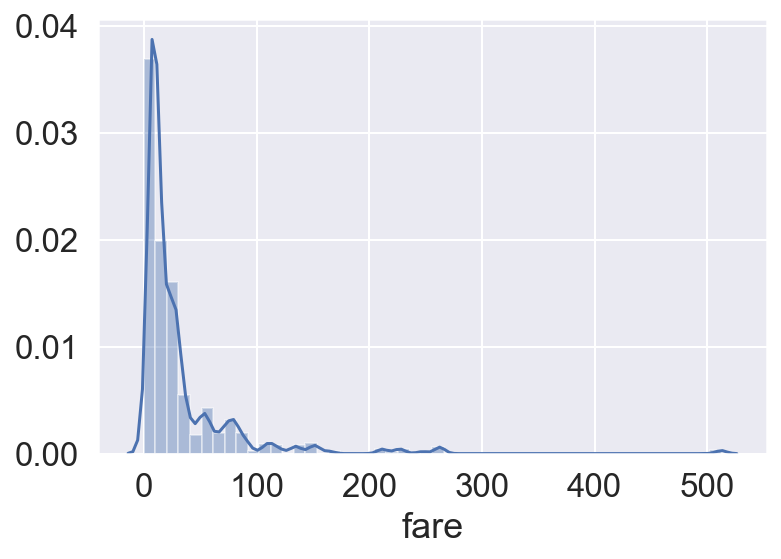

In [25]:
sns.distplot(df_training.fare)

In [26]:
        if df_training.fare.mean() < df_training.fare.median():
            print ('Since {} is less than {}, {} is left skewed'.
                   format(df_training.fare.mean() , df_training.fare.median() ,  'fare'))
        elif df_training.fare.mean() > df_training.fare.median():
            print ('Since {} is greater than {}, {} is right skewed'.
                   format(df_training.fare.mean() , df_training.fare.median() ,  'fare'))
        elif df_training.fare.mean() == df_training.fare.median():
            print ('Since {} is equal to {}, {} is normally distributed'.
                   format(df_training.fare.mean() , df_training.fare.median() ,  'fare'))

Since 32.2042079685746 is greater than 14.4542, fare is right skewed


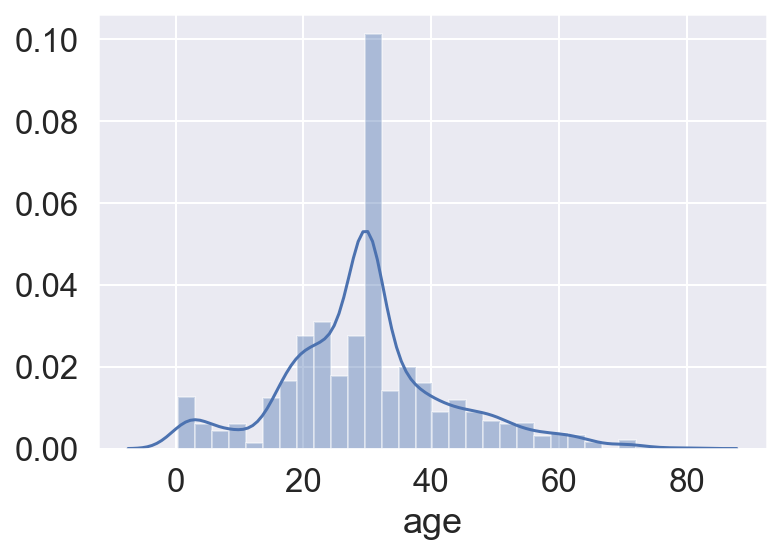

In [27]:
sns.distplot(df_training.age)

In [28]:
        if df_training.age.mean() < df_training.age.median():
            print ('Since {} is less than {}, {} is left skewed'.
                   format(df_training.age.mean() , df_training.age.median() ,  'age'))
        elif df_training.age.mean() > df_training.age.median():
            print ('Since {} is greater than {}, {} is right skewed'.
                   format(df_training.age.mean() , df_training.age.median() ,  'age'))
        elif df_training.age.mean() == df_training.age.median():
            print ('Since {} is equal to {}, {} is normally distributed'.
                   format(df_training.age.mean() , df_training.age.median() ,  'age'))

Since 29.73527650629942 is less than 29.881137667304014, age is left skewed


In [29]:
df_training[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Descriptive and Inferential Statistics

In [30]:
df_training.corr()

,passengerid,age,fare,survived
passengerid,1.000000,0.033093,0.012658,-0.005007
age,0.033093,1.000000,0.091002,-0.070323
fare,0.012658,0.091002,1.000000,0.257307
survived,-0.005007,-0.070323,0.257307,1.000000


## Visualize the data

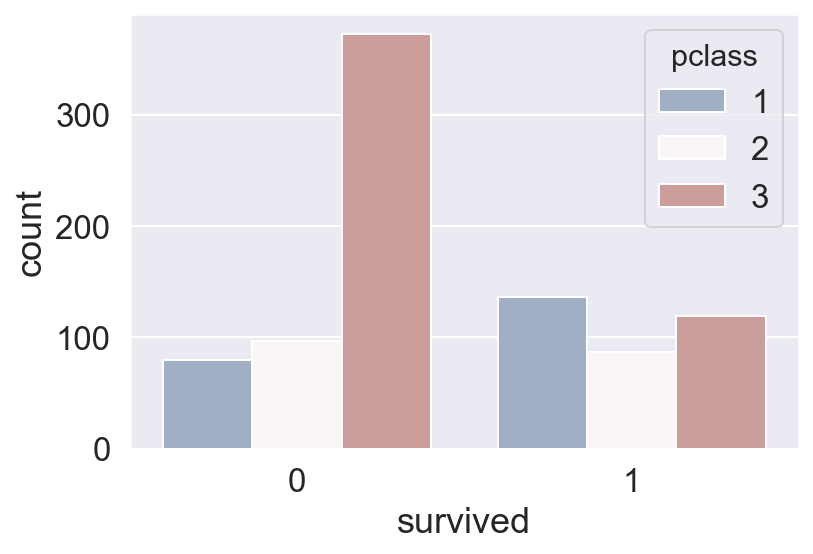

In [31]:
sns.countplot(df_training.survived,hue='pclass',data=df_training, palette="vlag")

In [32]:
df_training[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


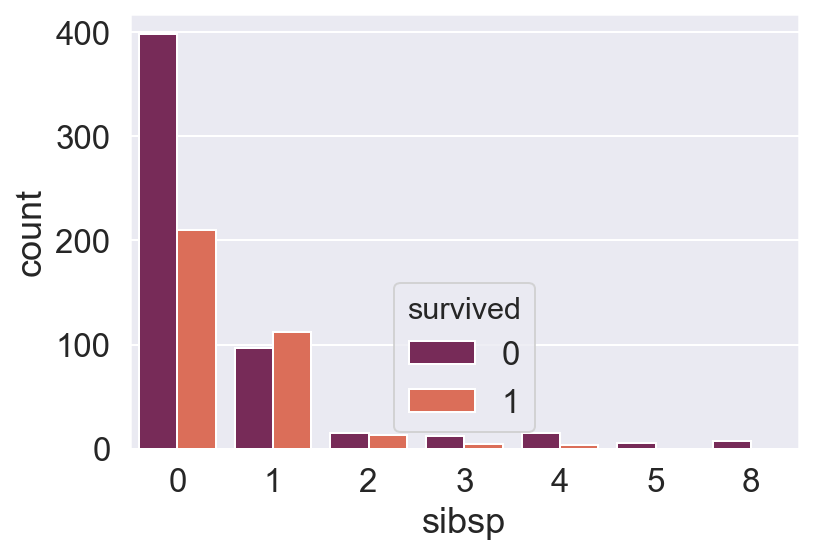

In [33]:
sns.countplot(df_training.sibsp,hue='survived',data=df_training, palette="rocket");

In [34]:
df_training[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.742038
1,male,0.188908


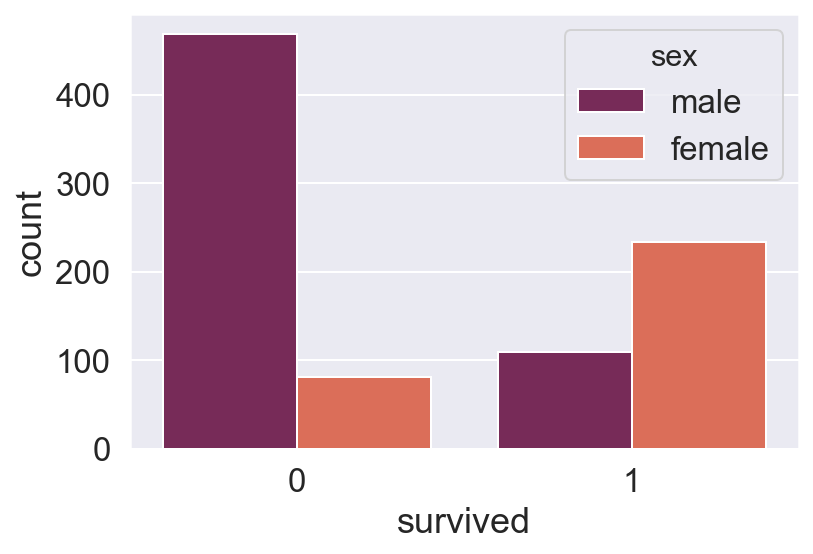

In [35]:
sns.countplot(df_training.survived,hue='sex',data=df_training, palette="rocket")

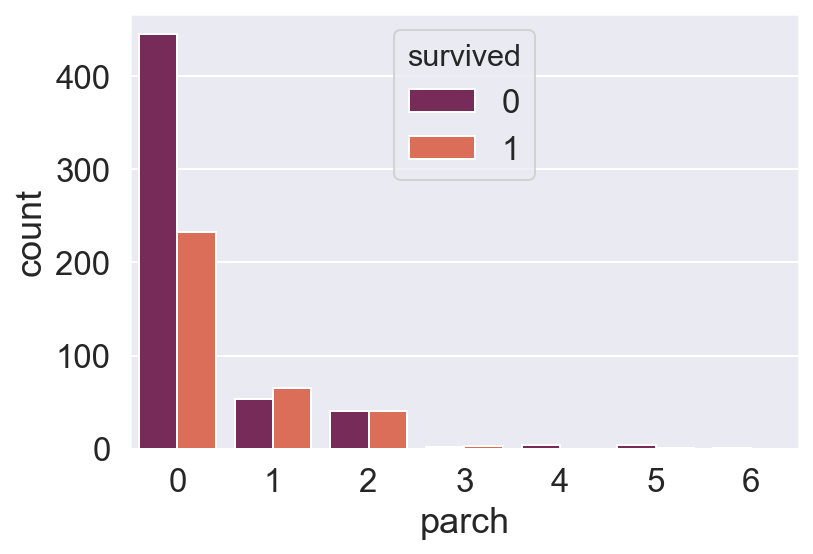

In [36]:
sns.countplot(df_training.parch,hue='survived',data=df_training, palette="rocket")

## Modeling

In [37]:
X_all = pd.get_dummies(Titanic.drop(['Cabin','Name','Ticket'], axis=1))
X_all.head(1)

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,7.25,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
X = X_all[X_all['PassengerId'] <= 891 ]
X.tail(1)

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
890,891,32.0,7.75,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
Xt = X_all[X_all['PassengerId'] > 891 ]
Xt.head(1)

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,7.8292,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
y = df_training['survived']

In [41]:
accuracy = pd.DataFrame()
accuracy['type'] = ['Training' , 'Testing']
accuracy.set_index('type')
accuracy

,type
0,Training
1,Testing


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle = True) 

### Linear:
- Logistic Regression
- Support Vector Machine

In [45]:
#Logistic Regression 

In [46]:
log = LogisticRegression()
log.fit(X_train, y_train) 
accuracy['Logistic Regression'] = (log.score(X_train,y_train),log.score(X_test,y_test) )

/Users/nora_1m/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)
log.fit(X_trains, y_train)
accuracy['Logistic Regression Scaled'] = (log.score(X_trains,y_train),log.score(X_tests,y_test) )

In [48]:
#SVM
#using linear kernal 
svm_l = svm.SVC(kernel='linear')
svm_l.fit(X_train, y_train)
accuracy['svm linear']= ( svm_l.score(X_train, y_train) , svm_l.score(X_test, y_test) )
accuracy

KeyboardInterrupt: 

In [60]:
#using RBF kernal 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
accuracy['svm rbf']= ( svm_rbf.score(X_train, y_train) , svm_rbf.score(X_test, y_test) )
accuracy

,type,Logistic Regression,svm linear,svm rbf
0,Training,0.801966,0.799157,0.640449
1,Testing,0.854749,0.832402,0.631285


In [186]:
#using polynomial kernal 
svm_p = svm.SVC(kernel='poly')
svm_p.fit(X_train, y_train)
accuracy['svm poly']= (svm_p.score(X_train, y_train) , svm_p.score(X_test, y_test))

In [187]:
accuracy

,type,Logistic Regression,svm linear,svm rbf,svm poly,KNN,KNN grid search,KNN Bagging,Decision Tree,Random Forest
0,Training,0.801966,0.799157,0.640449,0.633427,0.747191,0.679775,0.765449,1.000000,1.000000
1,Testing,0.854749,0.832402,0.631285,0.642458,0.664804,0.636872,0.631285,0.793296,0.854749


In [191]:
#bagging and SVM
svm_l = svm.SVC(kernel='linear')
svm_bg= BaggingClassifier(base_estimator=svm_l , n_estimators=5 , oob_score=True)
svm_bg.fit(X_train , y_train)
svm_bg.score(X_train , y_train) , svm_bg.score(X_test , y_test)

/Users/nora_1m/anaconda2/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/nora_1m/anaconda2/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


(0.7893258426966292, 0.8268156424581006)

### Nonlinear:
- KNN
- DT
- Random Forest (bagging with DT)

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy['KNN']= ( knn.score(X_train,y_train) , knn.score(X_test,y_test) )

In [51]:
#grid search with KNN
gd = GridSearchCV(knn,param_grid={'n_neighbors' : range(1,400)}, cv=5)
gd.fit(X_train,y_train)
accuracy['KNN grid search'] = (gd.score(X_train,y_train),gd.score(X_test,y_test))

In [52]:
gd.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

In [53]:
#KNN with bagging
knn = KNeighborsClassifier()
knn_en = BaggingClassifier(base_estimator=knn, oob_score=True)
knn_en.fit(X_train, y_train)
accuracy['KNN Bagging'] = ( knn_en.score(X_train, y_train) , knn_en.score(X_test, y_test))

/Users/nora_1m/anaconda2/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/nora_1m/anaconda2/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [54]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy['Decision Tree'] = (dt.score(X_train,y_train) , dt.score(X_test,y_test))
accuracy

,type,Logistic Regression,Logistic Regression Scaled,KNN,KNN grid search,KNN Bagging,Decision Tree
0,Training,0.818820,0.824438,0.737360,0.662921,0.744382,1.000000
1,Testing,0.804469,0.793296,0.659218,0.681564,0.642458,0.776536


In [57]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
rf.score(X,y)
accuracy['Random Forest'] = (rf.score(X_train,y_train) , rf.score(X_test, y_test))

In [58]:
accuracy

,type,Logistic Regression,Logistic Regression Scaled,KNN,KNN grid search,KNN Bagging,Decision Tree,Random Forest
0,Training,0.818820,0.824438,0.737360,0.662921,0.744382,1.000000,1.0
1,Testing,0.804469,0.793296,0.659218,0.681564,0.642458,0.776536,1.0


In [ ]:
#grid search
parameters = { 'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(rf, parameters, cv = 5)
random_grid.fit(X_train , y_train)
random_grid.score(X_train , y_train) , random_grid.score(X_test, y_test)

In [ ]:
random_grid.best_estimator_

In [61]:
# Fit Extra Trees
dt = ExtraTreesClassifier()
dt.fit(X_train, y_train)
dt.score(X_train , y_train) , dt.score(X_test , y_test)

(1.0, 0.7932960893854749)

In [62]:
dt_bag = BaggingClassifier(base_estimator=dt)
dt_bag.fit(X_train , y_train)
dt_bag.score(X_train , y_train) , dt_bag.score(X_test , y_test)

(0.9915730337078652, 0.8156424581005587)

# Testing

In [63]:
predict = pd.DataFrame(list(zip(df_testing.passengerid, rf.predict(Xt))),columns = ['PassengerId', 'Survived'])  

In [64]:
predict

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
predict.to_csv('predict.csv', index=False)

# Evaluation

In [66]:
pd.DataFrame(confusion_matrix(y_test , rf.predict(X_test) ), 
             columns=pd.MultiIndex.from_tuples([('Predicted', 'Not Survived'), ('Predicted', 'Survived')]),
             index=pd.MultiIndex.from_tuples([('Actual', 'Not Survived'), ('Actual', 'Survived')]))

Predicted         
                    Not Survived Survived
Actual Not Survived          112        0
       Survived                0       67

In [67]:
print( classification_report( y_test , rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        67

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



(0, 1, 0, 1)

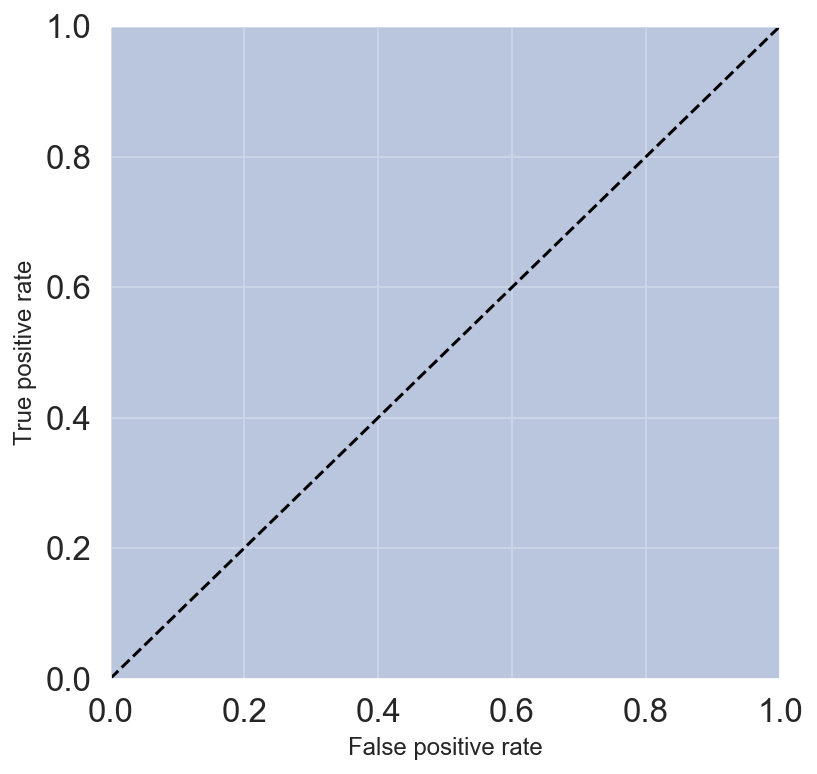

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict(X_test) )

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot([0, 1], [0, 1], color='black', ls='dashed')

ax.plot(fpr, tpr)
ax.fill_between(fpr, tpr, alpha=0.3)

ax.set_xlabel('False positive rate', fontsize=12)
ax.set_ylabel('True positive rate', fontsize=12)

ax.axis(xmin=0, xmax=1, ymin=0, ymax=1)